# **Content**

This notebook contains analysis of **Women's Clothing E-Commerce** dataset. Since this is real commercial data, it has been anonymized.

Dataset can be found on this [address](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)

Table of Contents

- Understanding Database
- Data cleaning & Wrangling
- Data Analysis
- Findings

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv("../data/Womens Clothing E-Commerce Reviews.csv",
                 sep=",",index_col="Unnamed: 0")

df_backup = df.copy()

### Understanding Database

In [42]:
'''
- There are less than hundred missing values for columns Division Name, Department Name and 
Class Name. Since this percentage is so low compared to whole dataset, I will exclude those
data for further analysis.

- I will exclude ages above 80 from the dataset in order to normalize data.

- Average age in our dataset is 43.
'''

print(f"Null Columns;\n{df.isnull().sum()}")
print("\n")
print(df.info())

Null Columns;
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Departm

### Data Cleaning and Wrangling

In [29]:
# Function to remove NaN values
def drop_missing_values(data,column):
    if data[column].isnull().sum() > 0:
        data = data[data[column].isnull() != True]
    else:
        pass
    return data

nan_columns = ["Division Name","Department Name","Class Name"]
for column in nan_columns:
    df = drop_missing_values(df,column)

In [30]:
# Removing records for ages under 18 and over 80.
df = df.drop(df[(df["Age"] > 80) |
                (df["Age"] < 18)].index)

In [31]:
# Creating a new column for binning age
interval = [18,30,40,50,60,70,80]
age_categorized = pd.cut(df["Age"],bins=interval,retbins=False,
                         include_lowest=True,
                         labels=["18-30","30-40","40-50","50-60","60-70","70-80"])
df.insert(2,"Age_Categorized",age_categorized)

### Data Analysis

Text(0.5, 1.0, 'Correlation Heatmap of Dataset')

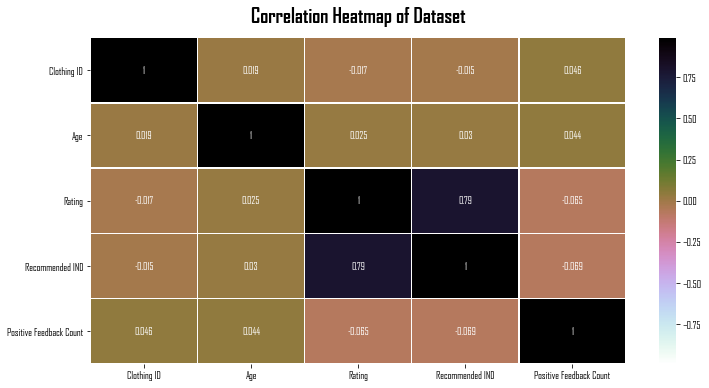

In [32]:
'''
Checking correlations with Heatmap.

Results;
- There is a strong positive correlation between rating and recommendation indicator.
'''
plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (12,6)

sns.heatmap(data=df.corr(), vmin=-0.99,vmax=0.99,
            annot= True, cbar=True,linewidth=0.5, cmap="cubehelix_r")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Dataset",size=20,fontweight="bold",pad=15)

#### Reviews & Ratings based on Age

Text(0.5, 1.0, 'Reviews per age')

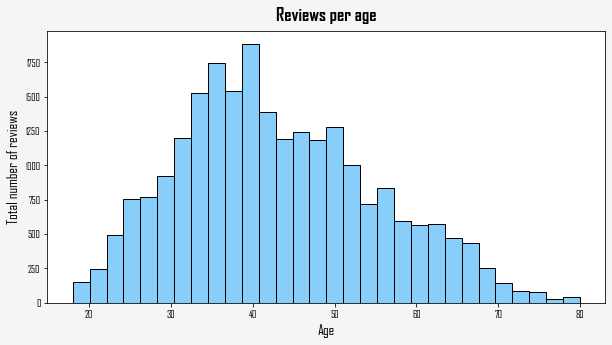

In [33]:
'''
Looking number of reviews per age.

Results;

- People with ages between 30-50 are the most reviewing group.
- Average age of people in our dataset is 43. 
'''

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['figure.facecolor'] = 'whitesmoke'

fig1, ax = plt.subplots(1,1)
ax.hist(df.Age, bins=30,color="lightskyblue",edgecolor="k")
ax.set_xlabel("Age",size=15)
ax.set_ylabel("Total number of reviews",size=15)
ax.set_title("Reviews per age",size=18,fontweight="bold",pad=10)

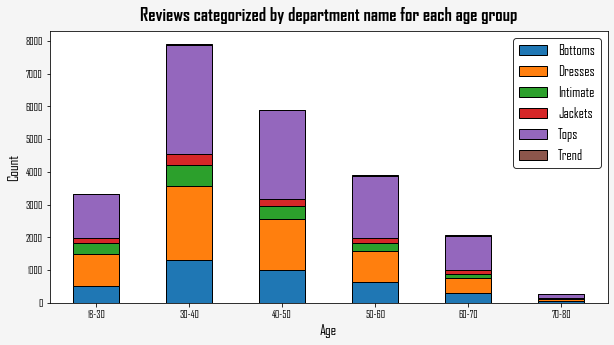

In [34]:
'''
Reviews categorized by dpt name for each age group
'''
fig6 , ax = plt.subplots(1,1)
df.groupby(['Department Name', age_categorized]).size().unstack(0).plot.bar(
    ax=ax,stacked=True,edgecolor="k")
ax.set_xlabel("Age",size=15)
ax.set_ylabel("Count",size=15)
ax.set_title("Reviews categorized by department name for each age group",size=18,
                fontweight="bold",pad=10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.legend(edgecolor="k",prop={"size":14})

Text(0.5, 1.0, 'Distribution of ratings per age')

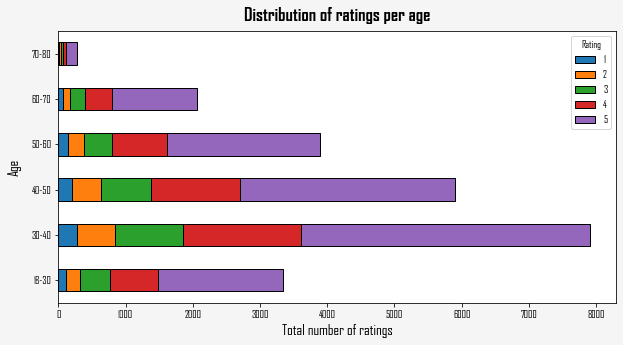

In [35]:
'''
Looking distribution of ratings per age group.

Results;
- People with ages more than 70 does not involve much for rating.
- People age in between 30-50 have involved more into rating compared to 
other groups(positive/negative)

'''

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (10,5)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
df.groupby(['Rating', age_categorized]).size().unstack(0).plot.barh(
    ax=ax2,stacked=True,edgecolor="k")
ax2.set_xlabel("Total number of ratings",size=15)
ax2.set_ylabel("Age",size=15,labelpad=10)
ax2.set_title("Distribution of ratings per age",size=18,fontweight="bold",pad=10)

Text(0.5, 1.0, 'Distribtuion of Ratings per Age')

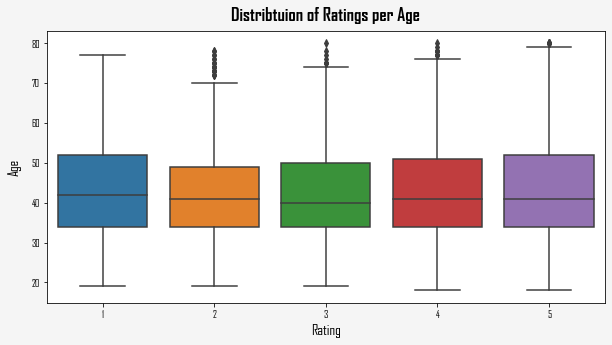

In [36]:
'''
Distribution of Ratings per Age - Boxplot

Upper/lower quartiles and median pretty close to each other so we can't conclude people in any 
specific age group give better/worse rating to products.

- We can see that our former conclusion is supported below "People age in between 30-50 have 
involved more into rating compared to other groups(positive/negative)"
'''

fig3, ax3 = plt.subplots(1,1)
sns.boxplot(data=df,x="Rating",y="Age"),
plt.xlabel("Rating",size=15)
plt.ylabel("Age",size=15,labelpad=10)
plt.yticks(rotation=360)
plt.title("Distribtuion of Ratings per Age",size=18,fontweight="bold",pad=10)

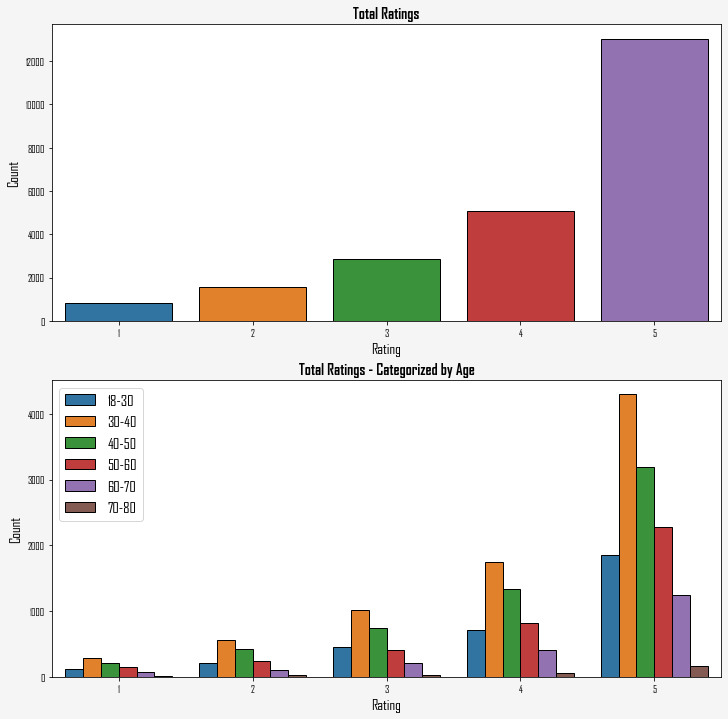

In [37]:
'''
Investigating number of ratings in the dataset

Results;

- Even though most customers look satisfied by looking given ratings, companies still needs to work
hard to make it better.
'''

fig4 , ax4 = plt.subplots(2,1,figsize=(12,12))
sns.countplot(data=df,x="Rating",ax=ax4[0],edgecolor="k")
ax4[0].set_title("Total Ratings",size=15,fontweight="bold")
ax4[0].set_ylabel("Count",size=15)
ax4[0].set_xlabel("Rating",size=15)
sns.countplot(data=df,x="Rating",hue="Age_Categorized",ax=ax4[1],edgecolor="k")
ax4[1].set_title("Total Ratings - Categorized by Age",size=15,fontweight="bold")
ax4[1].set_ylabel("Count",size=15)
ax4[1].set_xlabel("Rating",size=15)
ax4[1].legend(prop={"size":15})

In [38]:
'''
Checking percentages of 5 ratings and 1 ratings for people in the interval of 30-40 and 40-50 
since they are the most involved group in ratings.

Results;

- People in age between 30-40 have the highest percentage of giving 5 stars with percentage of 18.38%
- People in age between 40-50 have the second highest percentage of giving 5 stars with 
percentage of 13.67%

- People in age between 30-40 have the highest percentage of giving 1 stars with percentage of 1.19%
- People in age between 40-50 have the second highest percentage of giving 1 stars with
percentage of 0.89%

'''

five_ratio_list = []
one_ratio_list = []
labels=["18-30","30-40","40-50","50-60","60-70","70-80"]
def ratio_calculator(data):
    for i in range(0,len(labels)):
            five_ratio_list.append((len(data[(data["Age_Categorized"] == labels[i]) & 
                               (data["Rating"] == 5)]) / len(data))*100)
    for i in range(0,len(labels)):
            one_ratio_list.append((len(data[(data["Age_Categorized"] == labels[i]) & 
                               (data["Rating"] == 1)]) / len(data))*100)

ratio_calculator(df)
list_of_five = list(zip(five_ratio_list, labels))
list_of_one = list(zip(one_ratio_list, labels))
print("5 star percentages")
print('\n'.join(map(str, list_of_five)))
print("\n")
print("1 star percentages")
print('\n'.join(map(str, list_of_one)))

5 star percentages
(7.940786377444059, '18-30')
(18.38018226158388, '30-40')
(13.673897231848715, '40-50')
(9.754845334360159, '50-60')
(5.356608052025842, '60-70')
(0.697385872588029, '70-80')


1 star percentages
(0.48774226671800797, '18-30')
(1.1979634621144055, '30-40')
(0.8941941556496812, '40-50')
(0.6374876994823087, '50-60')
(0.32088307020921575, '60-70')
(0.04706285029735165, '70-80')


<ipython-input-39-6d5fb608a74c>:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(grid[1,:]).set_title("Reviews for each class",size=18,fontweight="bold",pad=10)


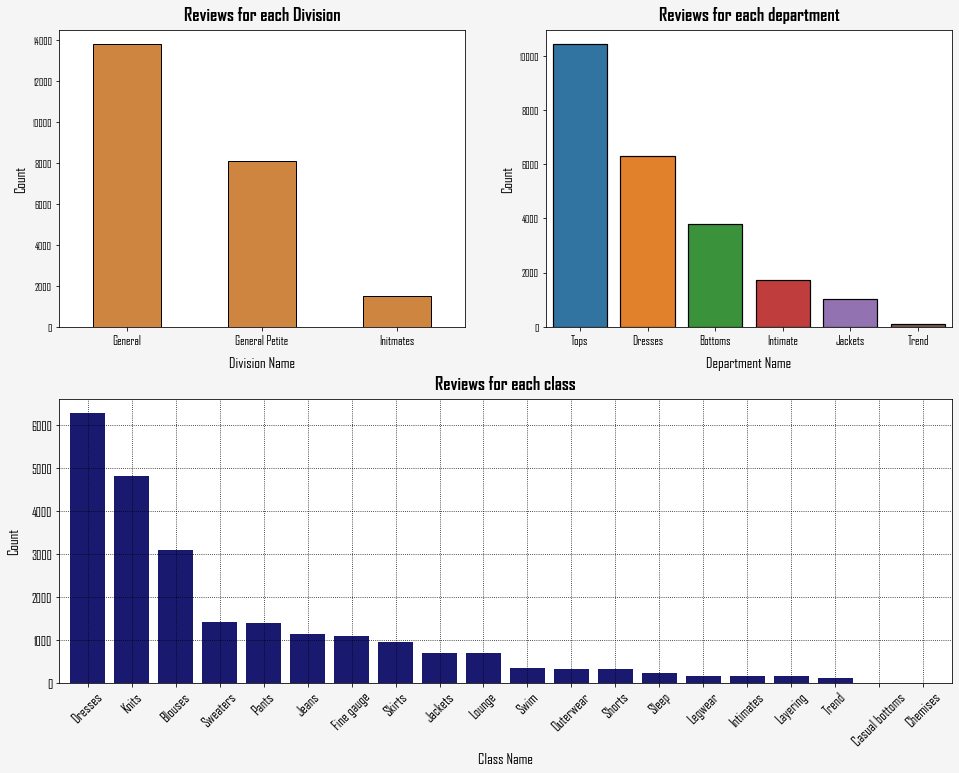

In [39]:
'''
Looking departments for each age group.

Results;
- Tops department has the highest number of reviews which leads that Tops department has the highest
review proportion compared to others.

- This is also supported by subplot2.

- Dresses department has the second highest reviews proportion after tops department. 
It is followed by Bottoms.

Suggestion;

- Apparently, customer likes Tops department the most, this department has to be investigated 
further and findings have to be applied to other departments in order to leverage sales.
'''

fig5 , ax = plt.subplots(2,2,figsize=(16,12))
df["Division Name"].value_counts().plot(kind="bar",width=0.5,edgecolor="k",
                                        color="peru",ax=ax[0,0])
ax[0,0].set_xlabel("Division Name",size=15,labelpad=10)
ax[0,0].set_ylabel("Count",size=15)
ax[0,0].set_title("Reviews for each Division",size=18,
                fontweight="bold",pad=10)
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(),rotation=0,size=12)


count_each_dpt = pd.pivot_table(df,values=["Class Name"],columns=[
    "Department Name"],aggfunc="count").T.sort_values(by="Class Name",ascending=False)
ax[0,1] = sns.barplot(data=count_each_dpt.reset_index(), x ="Department Name",
                    y="Class Name",edgecolor="k",linewidth=1.2,ax=ax[0,1])
ax[0,1].set_xlabel("Department Name",size=15,labelpad=10)
ax[0,1].set_ylabel("Count",size=15)
ax[0,1].set_title("Reviews for each department",size=18,fontweight="bold",pad=10)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation=0,size=12)


grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[1,:])
df["Class Name"].value_counts().plot(kind="bar",width=0.8,color="midnightblue")
plt.xlabel("Class Name",size=15)
plt.ylabel("Count",size=15,labelpad=10)
plt.subplot(grid[1,:]).set_title("Reviews for each class",size=18,fontweight="bold",pad=10)
plt.xticks(size=14,rotation=45)
plt.yticks(size=12)
plt.grid(True,c="k",linestyle=":")

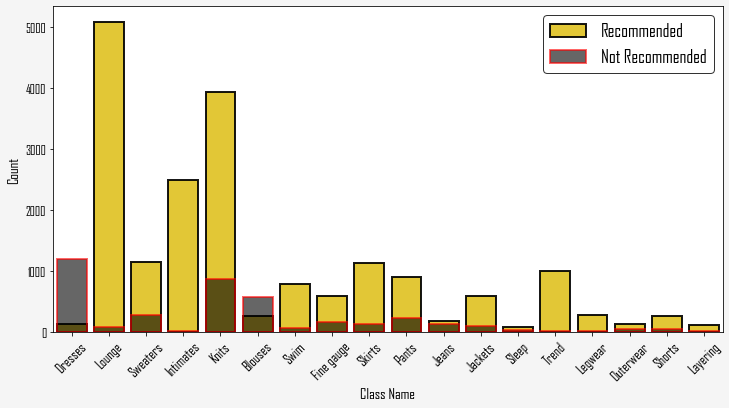

In [40]:
'''
Looking recommendations for each division/department/class

Results;

- Dresses,blouses and jeans classes need urgent care.
- Loung and intimates classes have quite good recommendations. Needs to investigated further to 
understand reason of it - and apply it to other classes.
-


'''

fig10 , ax = plt.subplots(1,1,figsize=(12,6))

df_rec = df[df["Recommended IND"]==1]
df_not_rec = df[df["Recommended IND"]==0]

sns.countplot(data=df_rec,x="Class Name",edgecolor="k",
              color="gold",alpha=0.9,linewidth=2,label="Recommended")
sns.countplot(data=df_not_rec,x="Class Name",edgecolor="red",
              color="k",alpha=0.6,linewidth=2,label="Not Recommended")
plt.xlabel("Class Name",size=15,fontweight=525)
plt.xticks(size=14,rotation=45)
plt.ylabel("Count",size=15,fontweight=525)
plt.yticks(size=12)
plt.legend(edgecolor="k",prop={"size":18})